**Data Analysis on Walmart Sales**

Work by:

Suprasanna VG.

3rd year Information Science & Enginnering at RNSIT Bangalore.

Mobile:9141147851

Email: suprasanna.gunaga@gmail.com


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel('/content/Walmart Sales (1).csv')

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [13]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

# **Analyzing the performance of sales and revenue at the city and branch level**

In [16]:
grouped_data = df.groupby(['City', 'Branch'])
sales_revenue = grouped_data.agg({'Quantity': 'sum', 'Unit price': 'sum'})
sales_revenue.columns = ['Total Quantity Sold', 'Total Revenue']
print("Performance of sales and revenue at the city and branch level:")
print(sales_revenue)

Performance of sales and revenue at the city and branch level:
                  Total Quantity Sold  Total Revenue
City      Branch                                    
Mandalay  A                       637        6349.11
          B                       664        6623.73
          C                       519        5506.04
Naypyitaw A                       648        5953.55
          B                       604        6298.64
          C                       579        6315.57
Yangon    A                       598        6342.88
          B                       631        6329.25
          C                       630        5953.36


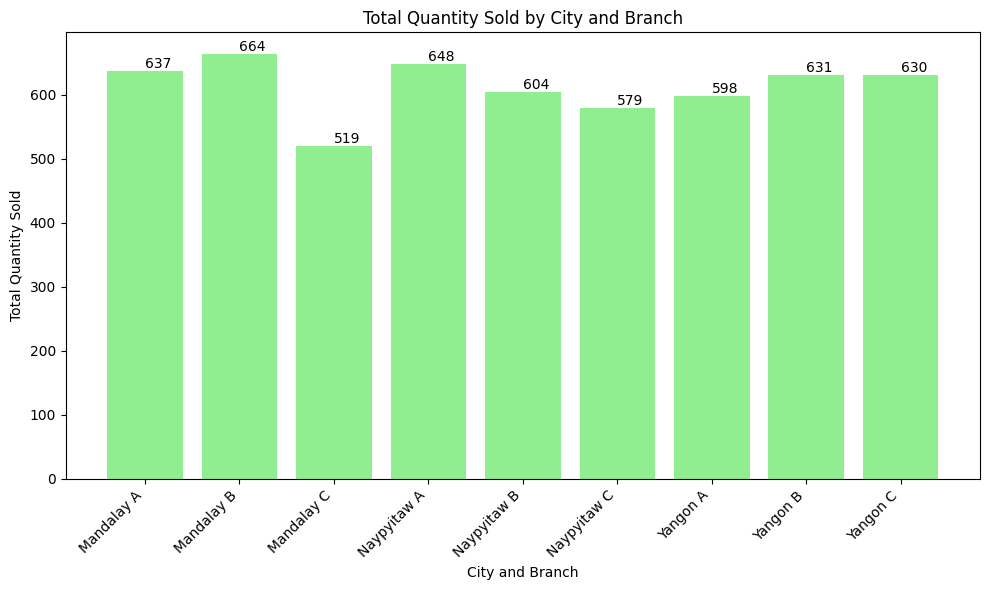

In [32]:

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sales_revenue)), sales_revenue['Total Quantity Sold'], color='lightgreen')
plt.xticks(range(len(sales_revenue)), sales_revenue['City'] + ' ' + sales_revenue['Branch'])
plt.xlabel('City and Branch')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by City and Branch')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()

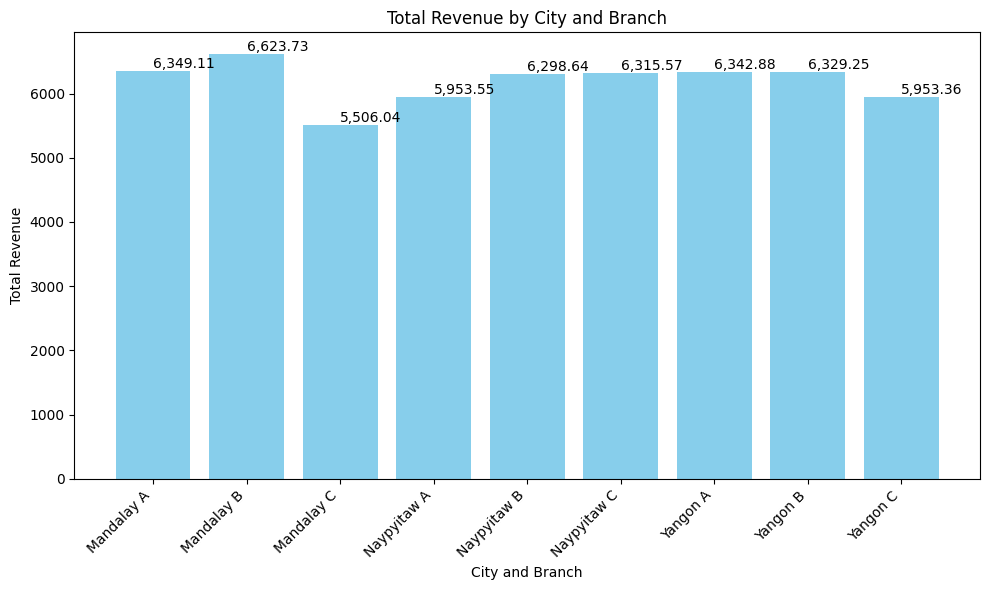

In [30]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sales_revenue)), sales_revenue['Total Revenue'], color='skyblue')
plt.xticks(range(len(sales_revenue)), sales_revenue['City'] + ' ' + sales_revenue['Branch'])
plt.xlabel('City and Branch')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by City and Branch')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "{:,.2f}".format(yval), va='bottom')

plt.show()

# **Average price of an item sold at each branch of the city.**

In [21]:
average_price = grouped_data['Unit price'].mean()
average_price


City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64

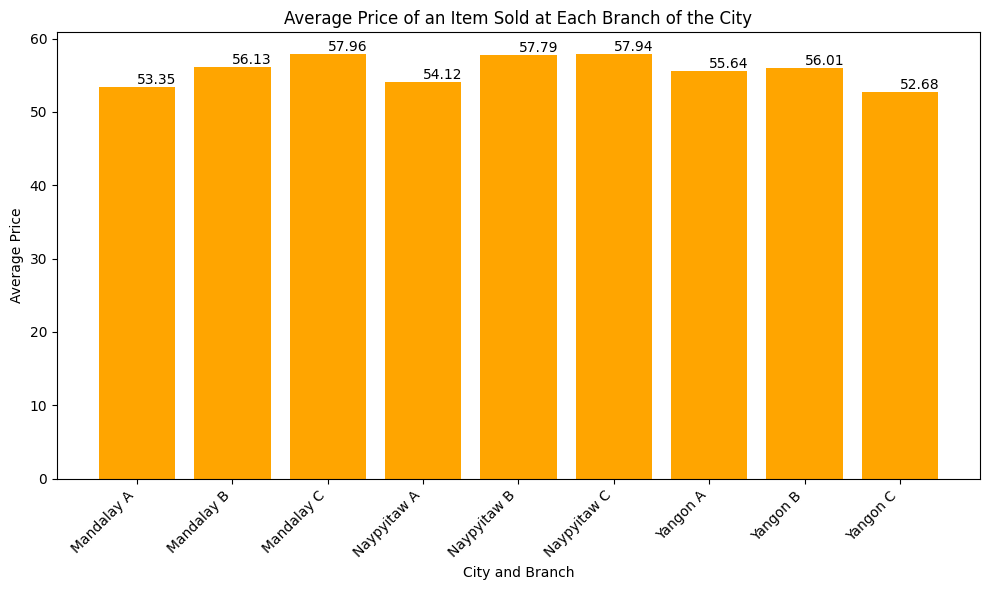

In [27]:
average_price = grouped_data['Unit price'].mean()


average_price = average_price.reset_index()

average_price.columns = ['City', 'Branch', 'Average Price']


plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(average_price)), average_price['Average Price'], color='orange')
plt.xticks(range(len(average_price)), average_price['City'] + ' ' + average_price['Branch'])
plt.xlabel('City and Branch')
plt.ylabel('Average Price')
plt.title('Average Price of an Item Sold at Each Branch of the City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()

# **Analyzing the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method.**

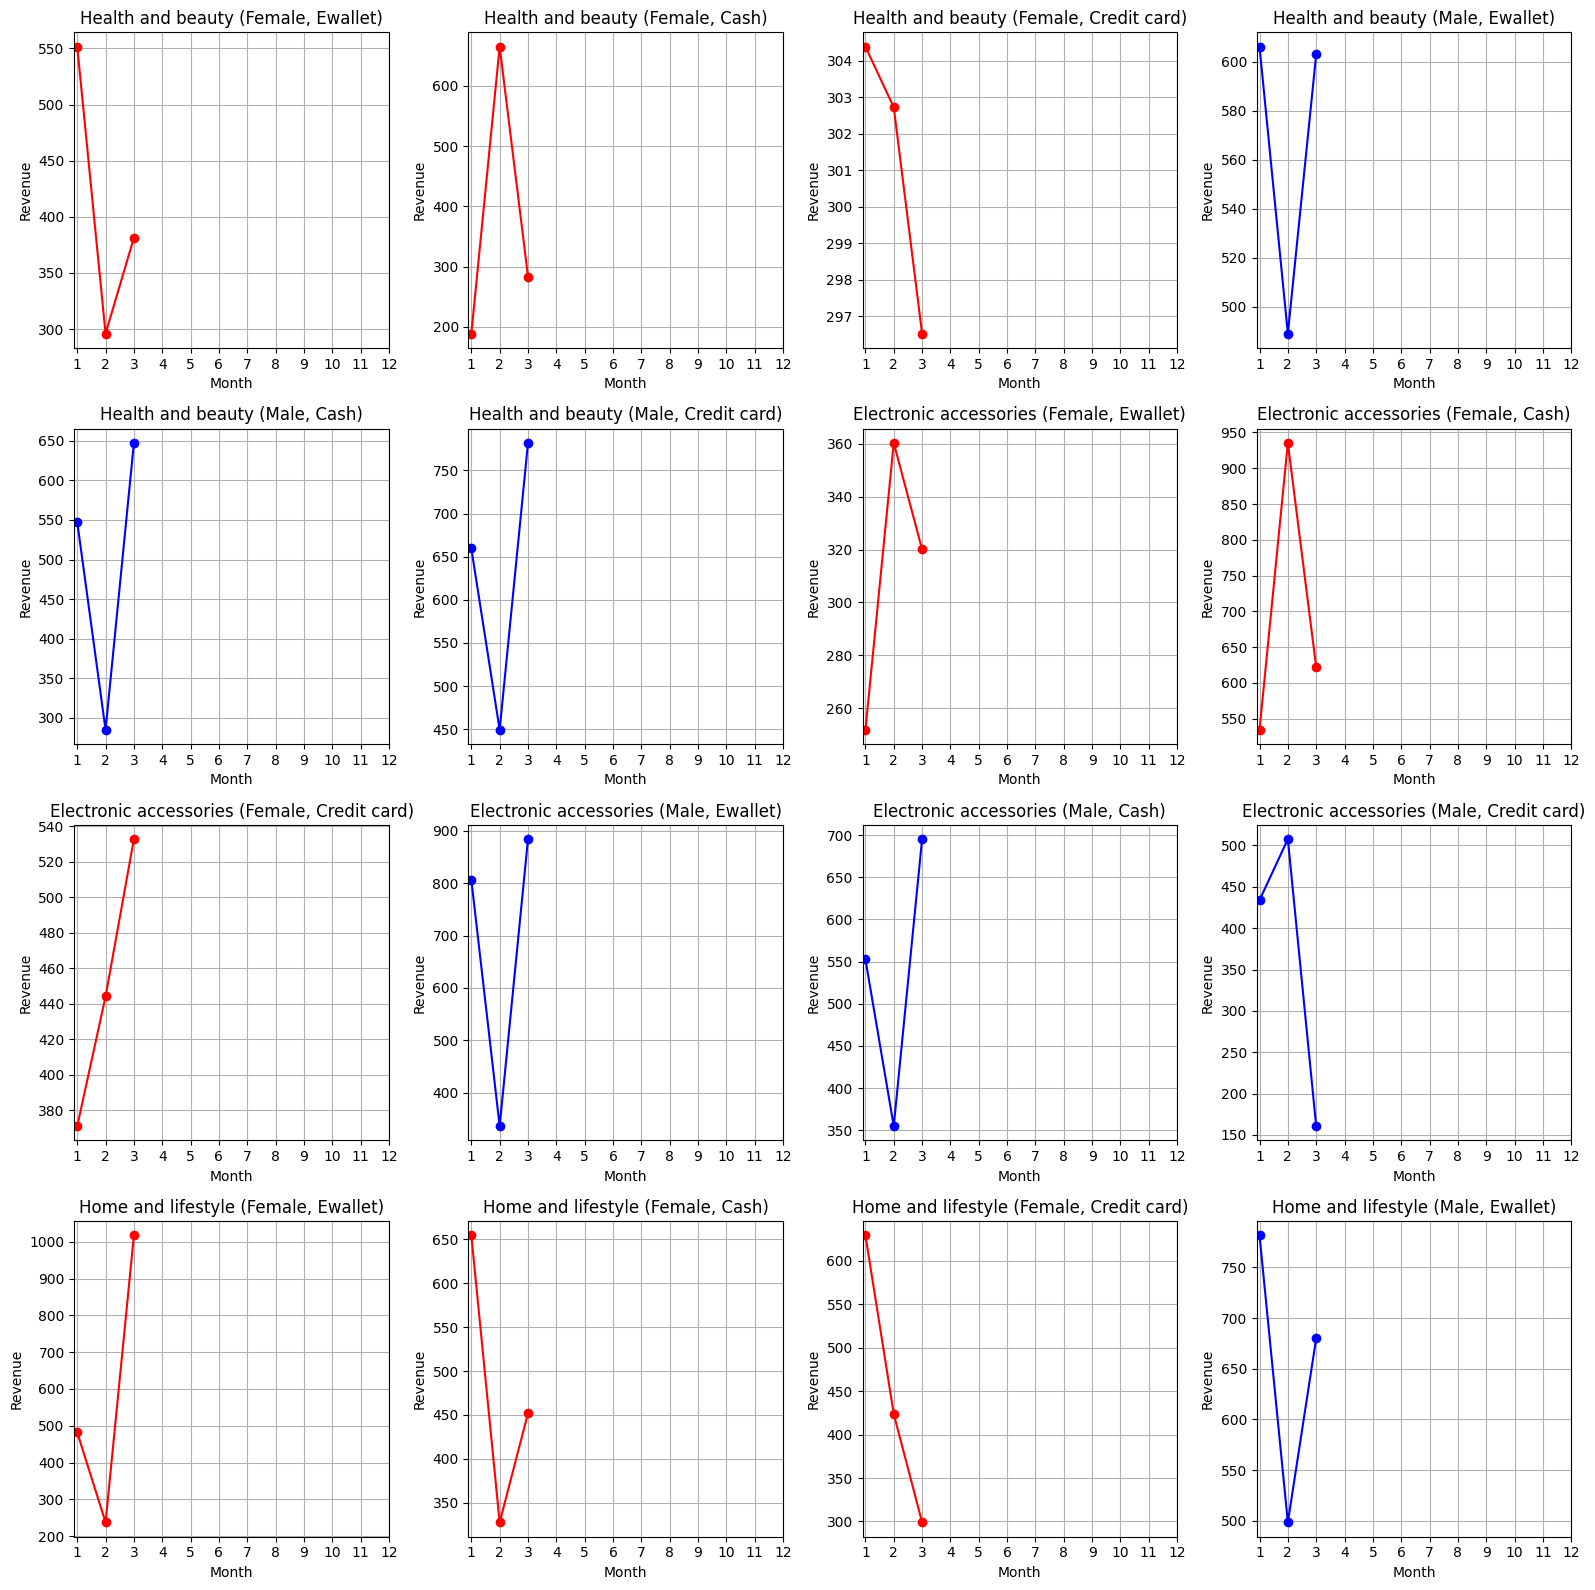

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

grouped_data = df.groupby(['Month', 'Product line', 'Gender', 'Payment'])

sales_revenue = grouped_data.agg({'Quantity': 'sum', 'Unit price': 'sum'}).rename(columns={'Quantity': 'Total Quantity', 'Unit price': 'Total Revenue'}).reset_index()

male_color = 'blue'
female_color = 'red'
payment_colors = {'Cash': 'green', 'Credit card': 'orange', 'Ewallet': 'purple'}

plots_per_row = 4
num_plots = 0
total_plots = 16

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for product_line in df['Product line'].unique():
    for gender in df['Gender'].unique():
        for payment_method in df['Payment'].unique():
            filtered_data = sales_revenue[(sales_revenue['Product line'] == product_line) &
                                          (sales_revenue['Gender'] == gender) &
                                          (sales_revenue['Payment'] == payment_method)]
            if not filtered_data.empty:
                row = num_plots // plots_per_row
                col = num_plots % plots_per_row

                if gender == 'Male':
                    axs[row, col].plot(filtered_data['Month'], filtered_data['Total Revenue'], marker='o', color=male_color)
                else:
                    axs[row, col].plot(filtered_data['Month'], filtered_data['Total Revenue'], marker='o', color=female_color)

                axs[row, col].set_title(f"{product_line} ({gender}, {payment_method})")
                axs[row, col].set_xlabel("Month")
                axs[row, col].set_ylabel("Revenue")
                axs[row, col].set_xticks(range(1, 13))
                axs[row, col].grid(True)

                num_plots += 1
                if num_plots >= total_plots:
                    break
            if num_plots >= total_plots:
                break
        if num_plots >= total_plots:
            break
    if num_plots >= total_plots:
        break

plt.tight_layout()
plt.show()

# **Identifying the focus areas to get better sales for April 2019.**

**Identifying the Months in the data set**

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

months = df['Date'].dt.month

# to get unique months
unique_months = sorted(months.unique())

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

print("Months in the dataset:")
for month in unique_months:
    print(month_names[month])

Months in the dataset:
January
February
March


<ipython-input-67-c118cccb86f8>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


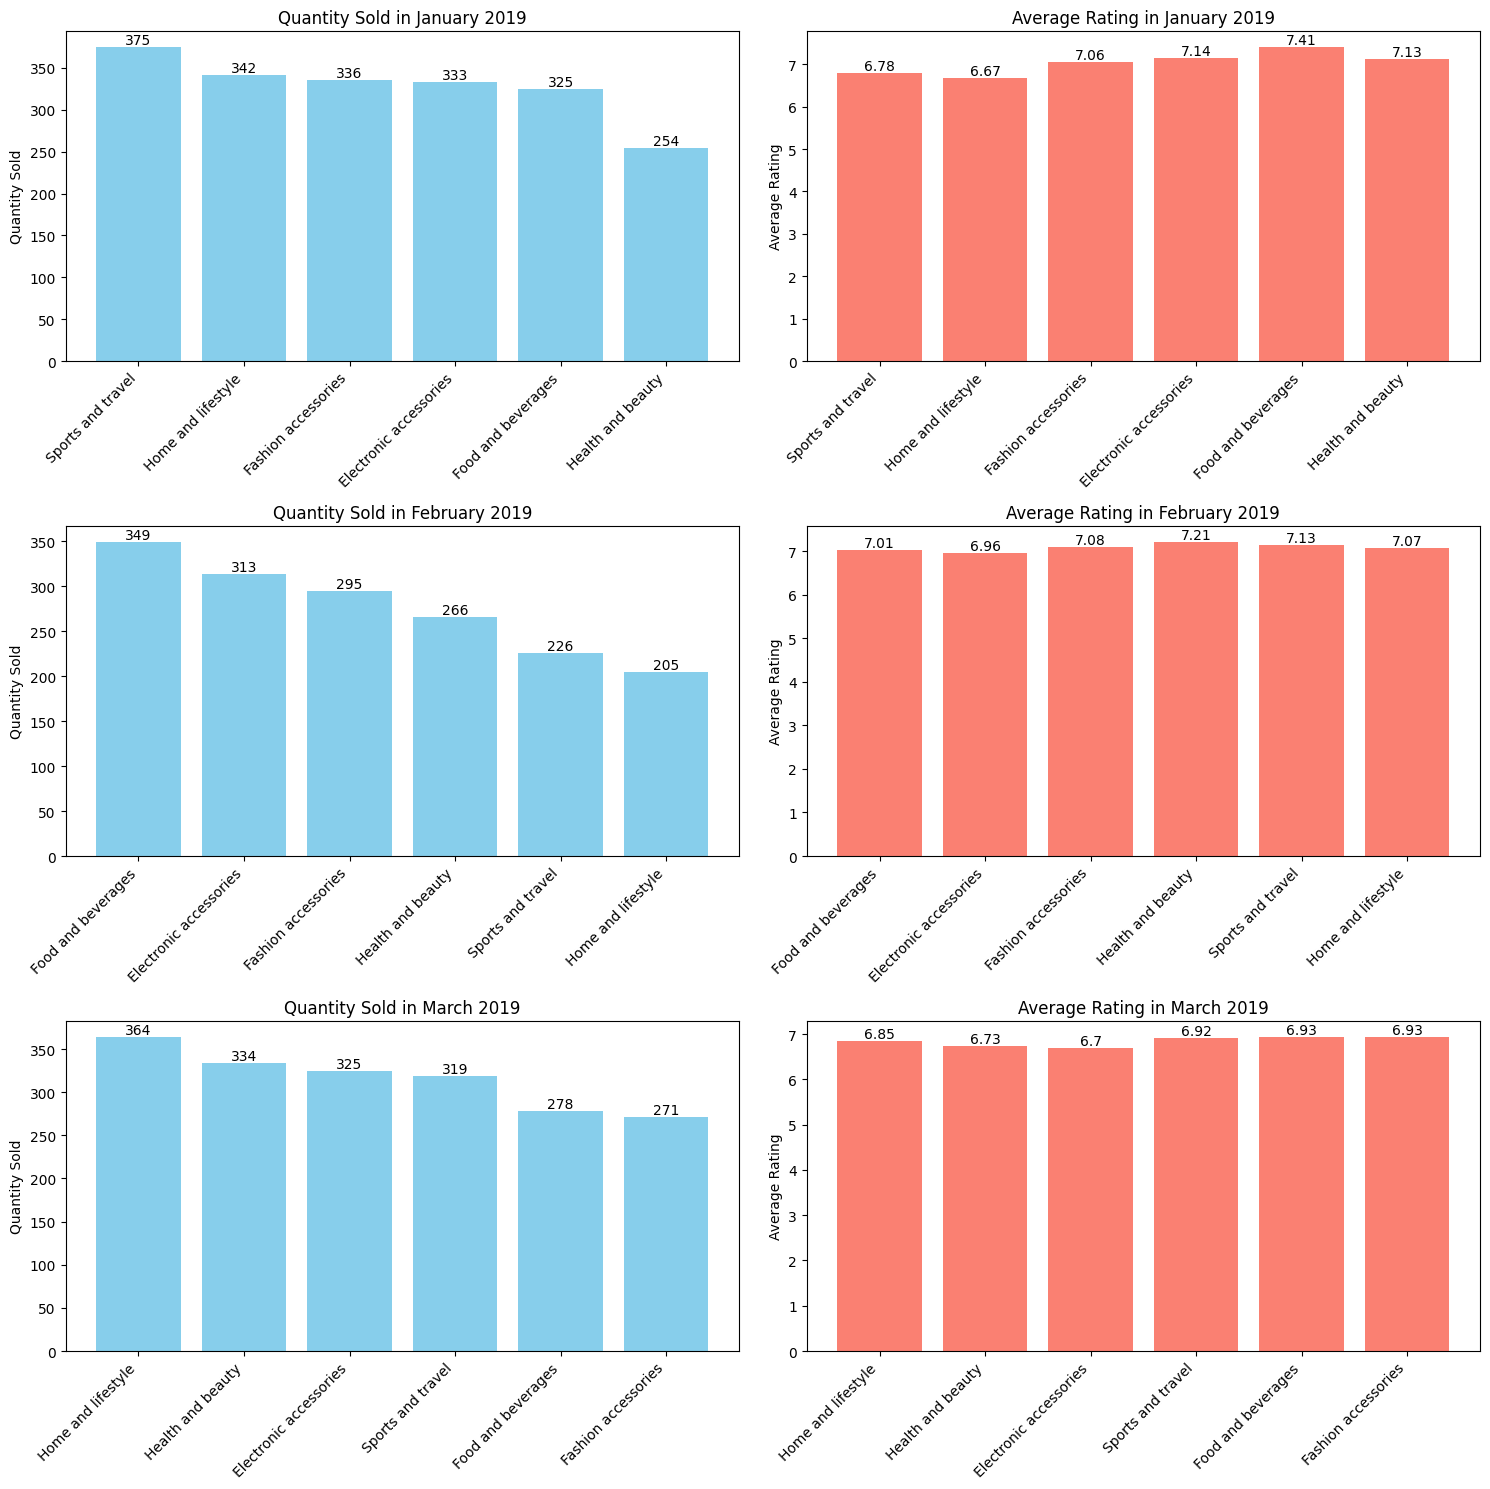

In [67]:
df['Date'] = pd.to_datetime(df['Date'])

jan_2019_sales = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 1)]
feb_2019_sales = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 2)]
mar_2019_sales = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 3)]

product_line_sales_jan = jan_2019_sales.groupby('Product line').agg({'Quantity': 'sum', 'Rating': 'mean'})
product_line_sales_feb = feb_2019_sales.groupby('Product line').agg({'Quantity': 'sum', 'Rating': 'mean'})
product_line_sales_mar = mar_2019_sales.groupby('Product line').agg({'Quantity': 'sum', 'Rating': 'mean'})

product_line_sales_jan = product_line_sales_jan.sort_values(by='Quantity', ascending=False)
product_line_sales_feb = product_line_sales_feb.sort_values(by='Quantity', ascending=False)
product_line_sales_mar = product_line_sales_mar.sort_values(by='Quantity', ascending=False)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes[0, 0].bar(product_line_sales_jan.index, product_line_sales_jan['Quantity'], color='skyblue')
axes[0, 0].set_title('Quantity Sold in January 2019')
axes[0, 0].set_ylabel('Quantity Sold')
axes[0, 1].bar(product_line_sales_jan.index, product_line_sales_jan['Rating'], color='salmon')
axes[0, 1].set_title('Average Rating in January 2019')
axes[0, 1].set_ylabel('Average Rating')

for i, val in enumerate(product_line_sales_jan['Quantity']):
    axes[0, 0].text(i, val, int(val), ha='center', va='bottom')

for i, val in enumerate(product_line_sales_jan['Rating']):
    axes[0, 1].text(i, val, round(val, 2), ha='center', va='bottom')

axes[1, 0].bar(product_line_sales_feb.index, product_line_sales_feb['Quantity'], color='skyblue')
axes[1, 0].set_title('Quantity Sold in February 2019')
axes[1, 0].set_ylabel('Quantity Sold')
axes[1, 1].bar(product_line_sales_feb.index, product_line_sales_feb['Rating'], color='salmon')
axes[1, 1].set_title('Average Rating in February 2019')
axes[1, 1].set_ylabel('Average Rating')

for i, val in enumerate(product_line_sales_feb['Quantity']):
    axes[1, 0].text(i, val, int(val), ha='center', va='bottom')

for i, val in enumerate(product_line_sales_feb['Rating']):
    axes[1, 1].text(i, val, round(val, 2), ha='center', va='bottom')

axes[2, 0].bar(product_line_sales_mar.index, product_line_sales_mar['Quantity'], color='skyblue')
axes[2, 0].set_title('Quantity Sold in March 2019')
axes[2, 0].set_ylabel('Quantity Sold')
axes[2, 1].bar(product_line_sales_mar.index, product_line_sales_mar['Rating'], color='salmon')
axes[2, 1].set_title('Average Rating in March 2019')
axes[2, 1].set_ylabel('Average Rating')

for i, val in enumerate(product_line_sales_mar['Quantity']):
    axes[2, 0].text(i, val, int(val), ha='center', va='bottom')

for i, val in enumerate(product_line_sales_mar['Rating']):
    axes[2, 1].text(i, val, round(val, 2), ha='center', va='bottom')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()


 *Focusing area to get better sales for April 2019.*

*   **From the above visualization its noticed that  Quantity sold of Fashion accessories is less compared to other products**.
*   **The average rating of Health and beauty is less compared to other products rating.**



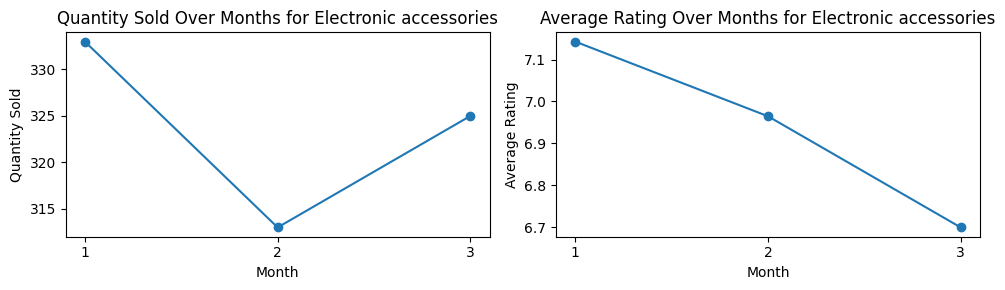

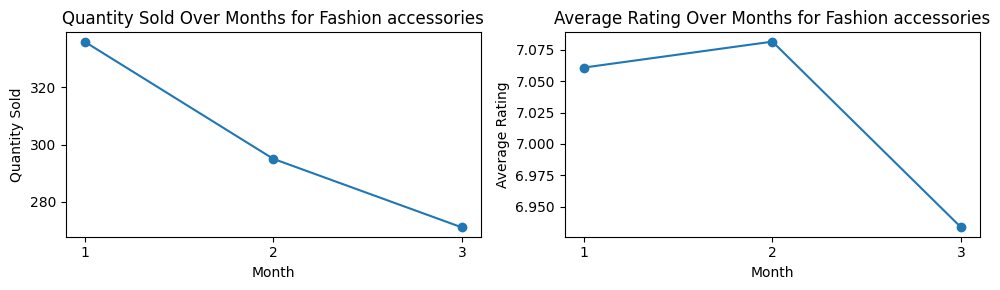

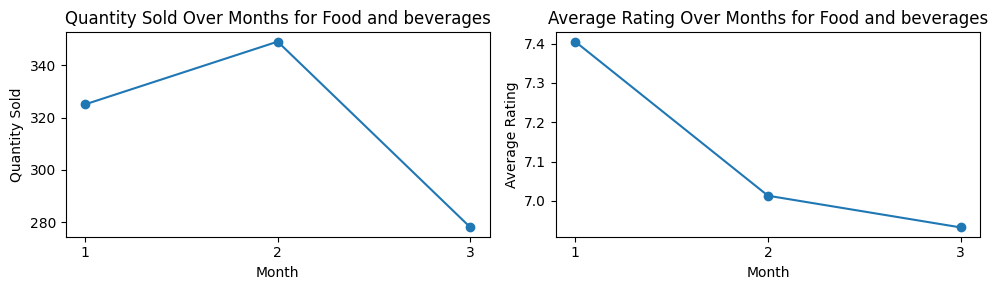

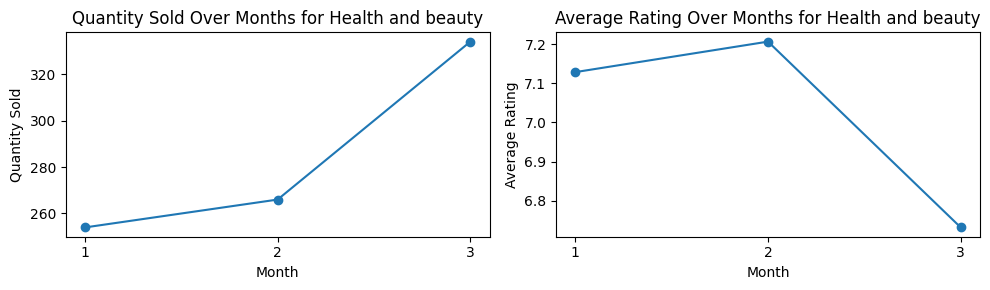

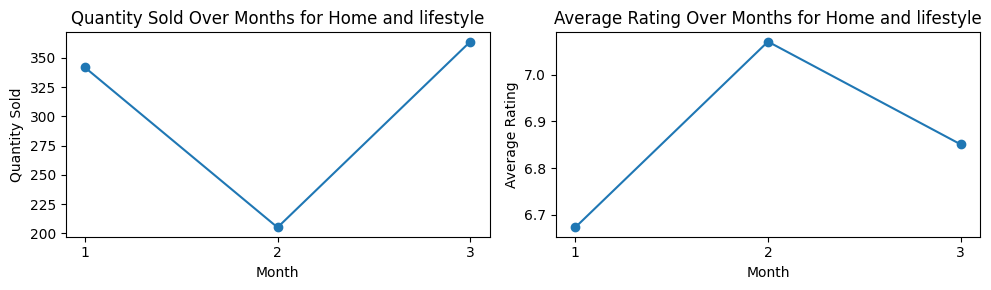

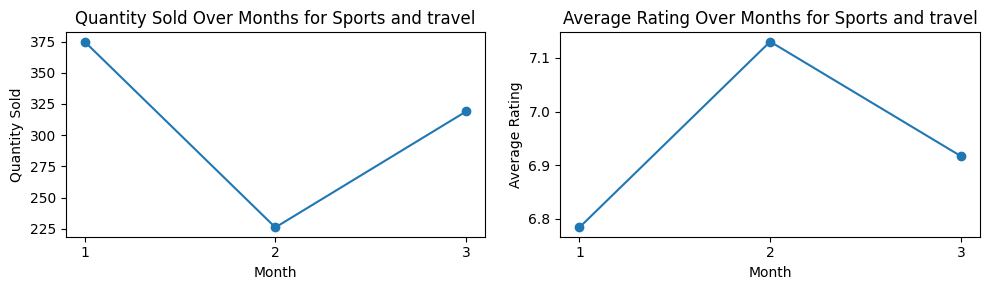

In [76]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

jan_mar_df = df[df['Month'].isin([1, 2, 3])]

product_line_monthly_stats = jan_mar_df.groupby(['Product line', 'Month', 'Year']).agg({'Quantity': 'sum', 'Rating': 'mean'}).reset_index()

for product_line in product_line_monthly_stats['Product line'].unique():

    product_line_data = product_line_monthly_stats[product_line_monthly_stats['Product line'] == product_line]

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))


    axes[0].plot(product_line_data['Month'], product_line_data['Quantity'], marker='o', linestyle='-')
    axes[0].set_title(f'Quantity Sold Over Months for {product_line}')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Quantity Sold')
    axes[0].set_xticks([1, 2, 3])  # January, February, March


    axes[1].plot(product_line_data['Month'], product_line_data['Rating'], marker='o', linestyle='-')
    axes[1].set_title(f'Average Rating Over Months for {product_line}')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Average Rating')
    axes[1].set_xticks([1, 2, 3])  # January, February, March


    plt.tight_layout()
    plt.show()

*Focusing area to get better sales for April 2019.*

From the above visualization its noticed that **Quantity Sold of below products decreased from February to March.**


*   Fashion Accessories
*   Food and Beverages

**Average rating of All products decreased from February to March.**
*   Electronic Accessories
*   Fashion Accessories
*   Food and Beverages
*   Health and Beauty
*   Home and lifestyle
*   Sports and travel









**Least sold items from last 3 months**

Product lines with the least quantity sold and revenue:
          Product line  Quantity  Unit price     Revenue
3    Health and beauty       854     8337.88  7120549.52
1  Fashion accessories       902    10173.35  9176361.70
4   Home and lifestyle       911     8850.71  8062996.81
5    Sports and travel       920     9460.88  8704009.60
2   Food and beverages       952     9745.54  9277754.08


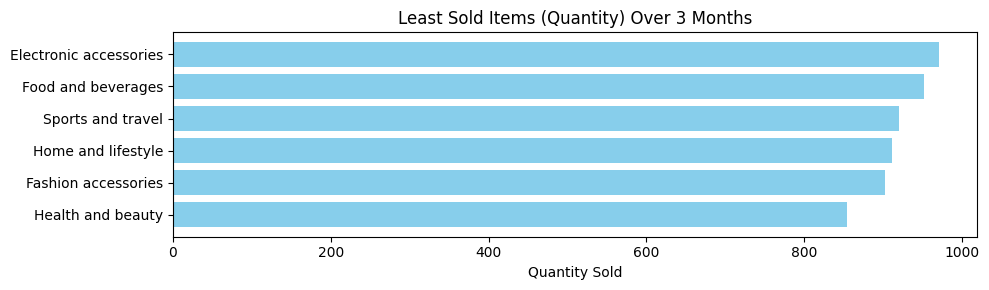

In [82]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

jan_mar_data = df[(df['Month'] >= 1) & (df['Month'] <= 3)]

product_line_sales = jan_mar_data.groupby('Product line').agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()

product_line_sales['Revenue'] = product_line_sales['Quantity'] * product_line_sales['Unit price']

product_line_sales = product_line_sales.sort_values(by=['Quantity', 'Revenue'], ascending=[True, True])

print("Product lines with the least quantity sold and revenue:")
print(product_line_sales.head())

fig, ax = plt.subplots(figsize=(10, 3))

ax.barh(product_line_sales['Product line'], product_line_sales['Quantity'], color='skyblue')
ax.set_title('Least Sold Items (Quantity) Over 3 Months')
ax.set_xlabel('Quantity Sold')

plt.tight_layout()
plt.show()

*Focusing area to get better sales for April 2019.*

**Health and beauty products were less sold items over 3 months**

#  **Conclusion**


**The Areas need to be focussed in ordered to get better sales for April 2019**


1.    **Quantity sold of Fashion accessories is less compared to other products.**
2.   **The average rating of Health and beauty is less compared to other products rating.**
   
3.   **Quantity Sold of below products decreased from February to March.**
*   Fashion Accessories
*   Food and Beverages


4. **Average rating of All products decreased from February to March.**

*   Electronic Accessories
*   Fashion Accessories
*   Food and Beverages
*   Health and Beauty
*   Home and lifestyle
*   Sports and travel

5. **Health and beauty products were less sold items over 3 months.**